In [1]:
# Fix MKL threading issue before importing any libraries
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'

#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the directory where this notebook is located
NOTEBOOK_DIR = os.path.dirname(os.path.abspath('__file__')) if '__file__' in dir() else os.getcwd()

# Create subdirectories for organized output
PLOTS_DIR = os.path.join(NOTEBOOK_DIR, 'plots')
os.makedirs(PLOTS_DIR, exist_ok=True)

#Read the datasets
lab = pd.read_csv(os.path.join(NOTEBOOK_DIR, 'laboratory.csv'))
room = pd.read_csv(os.path.join(NOTEBOOK_DIR, 'one_room_apartement.csv'))

In [3]:
#Check the number of data and columns
lab.info(), room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51186 entries, 0 to 51185
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TypPS           51186 non-null  float64       
 1   oxygen          51186 non-null  float64       
 2   pm10            51186 non-null  float64       
 3   cnt0_5          51186 non-null  float64       
 4   co              51186 non-null  float64       
 5   temperature     51186 non-null  float64       
 6   performance     51186 non-null  float64       
 7   co2             51186 non-null  float64       
 8   measuretime     51186 non-null  int64         
 9   so2             51186 non-null  float64       
 10  no2             51186 non-null  float64       
 11  cnt5            51186 non-null  float64       
 12  timestamp       51186 non-null  datetime64[ns]
 13  pm1             51186 non-null  float64       
 14  cnt1            51186 non-null  float64       
 15  de

(None, None)

In [4]:
#Check missing values
lab.isna().sum(), room.isna().sum()

(TypPS             0
 oxygen            0
 pm10              0
 cnt0_5            0
 co                0
 temperature       0
 performance       0
 co2               0
 measuretime       0
 so2               0
 no2               0
 cnt5              0
 timestamp         0
 pm1               0
 cnt1              0
 dewpt             0
 tvoc              0
 pressure          0
 cnt10             0
 dCO2dt            0
 sound_max         0
 health            0
 temperature_o2    0
 cnt2_5            0
 o3                0
 humidity          0
 dHdt              0
 humidity_abs      0
 sound             0
 pm2_5             0
 cnt0_3            0
 Duration          0
 dtype: int64,
 TypPS             0
 oxygen            0
 pm10              0
 cnt0_5            0
 co                0
 temperature       0
 performance       0
 co2               0
 measuretime       0
 so2               0
 no2               0
 cnt5              0
 timestamp         0
 pm1               0
 cnt1              

In [5]:
lab_h = lab.groupby(lab['Duration'][::30]).mean()
room_h = room.groupby(room['Duration'][::30]).mean()

# **I do not need all above parameters in this study so I only select several parameters**

In [6]:
lab_n = lab_h[['temperature', 'humidity', 'co2', 'tvoc', 'o3', 'pm1', 'pm2_5', 'pm10']].reset_index()
room_n = room_h[['temperature', 'humidity', 'co2', 'tvoc', 'o3', 'pm1', 'pm2_5', 'pm10']].reset_index()
lab_n = lab_n.drop('Duration', axis=1)
room_n = room_n.drop('Duration', axis=1)
lab_n.insert(0, 'Time',lab_h['Duration'].round().to_list())
room_n.insert(0, 'Time',room_h['Duration'].round().to_list())

In [7]:
# Define constant for IAQ without O3 column name
IAQ_WITHOUT_O3 = 'IAQ_without o3'

room_n['IAQ'] = (room_n['pm1']<=10) & (room_n['pm2_5']<=25) & (room_n['pm10']<=50) & (room_n['co2']<800) & (room_n['tvoc']<300) & (room_n['o3']<18)
room_n['IAQ'] = room_n['IAQ'].astype(object).replace({False:'POOR', True:'GOOD'})

room_n[IAQ_WITHOUT_O3] = (room_n['pm1']<=10) & (room_n['pm2_5']<=25) & (room_n['pm10']<=50) & (room_n['co2']<800) & (room_n['tvoc']<300)
room_n[IAQ_WITHOUT_O3] = room_n[IAQ_WITHOUT_O3].astype(object).replace({False:'POOR', True:'GOOD'})

lab_n['IAQ'] = (lab_n['pm1']<=10) & (lab_n['pm2_5']<=25) & (lab_n['pm10']<=50) & (lab_n['co2']<800) & (lab_n['tvoc']<300) & (lab_n['o3']<18)
lab_n['IAQ'] = lab_n['IAQ'].astype(object).replace({False:'POOR', True:'GOOD'})

In [8]:
lab_n

,Time,temperature,humidity,co2,tvoc,o3,pm1,pm2_5,pm10,IAQ
0,0.0,20.867,44.833,548.505,0.000,11.550,0.000,0.000,0.007,GOOD
1,1.0,20.756,45.028,532.743,0.000,9.499,0.000,0.000,0.000,GOOD
2,2.0,20.666,45.552,576.666,0.000,9.917,0.000,0.000,0.000,GOOD
3,3.0,20.221,46.230,566.978,2.191,9.790,0.000,0.000,0.006,GOOD
4,4.0,19.973,46.508,547.174,9.812,9.635,0.000,0.000,0.006,GOOD
...,...,...,...,...,...,...,...,...,...,...
1702,1819.0,23.324,51.178,570.073,675.302,31.956,2.529,3.759,4.971,POOR
1703,1820.0,23.562,49.538,582.368,755.566,33.555,2.322,3.081,3.702,POOR
1704,1821.0,24.003,45.645,601.980,636.803,34.610,2.787,3.086,4.007,POOR
1705,1822.0,24.153,41.807,554.425,517.582,35.828,2.540,2.765,3.064,POOR


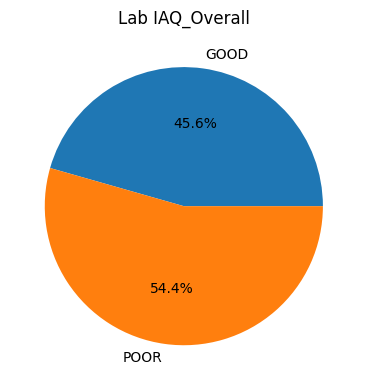

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
lab_iaq_values = lab_n['IAQ'].to_numpy()
unique_vals, counts = np.unique(lab_iaq_values, return_counts=True)
ax.pie(counts/len(lab_n), labels=unique_vals.tolist(), autopct='%.1f%%')
ax.set_title('Lab IAQ_Overall')
plt.savefig(os.path.join(PLOTS_DIR, 'lab_iaq_overall.png'), dpi=150, bbox_inches='tight')

In [10]:
room_n

,Time,temperature,humidity,co2,tvoc,o3,pm1,pm2_5,pm10,IAQ,IAQ_without o3
0,0.0,23.718,60.385,490.458,88.673,26.690,4.772,5.402,6.004,POOR,GOOD
1,1.0,22.373,65.432,534.482,230.238,27.959,6.754,8.412,8.459,POOR,GOOD
2,2.0,21.920,65.723,500.315,109.604,33.040,7.822,9.126,9.343,POOR,GOOD
3,3.0,21.936,65.394,521.991,151.848,31.325,6.953,8.170,8.171,POOR,GOOD
4,4.0,21.639,66.460,511.932,136.713,31.642,9.451,12.045,13.351,POOR,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
410,412.0,25.156,48.929,461.822,882.978,23.007,1.800,2.131,2.458,POOR,POOR
411,413.0,25.161,49.694,469.374,1056.400,23.958,2.011,2.842,3.977,POOR,POOR
412,414.0,25.388,50.408,448.272,654.926,28.707,2.338,2.548,3.037,POOR,POOR
413,415.0,26.063,51.525,437.336,628.996,34.629,2.141,2.583,3.272,POOR,POOR


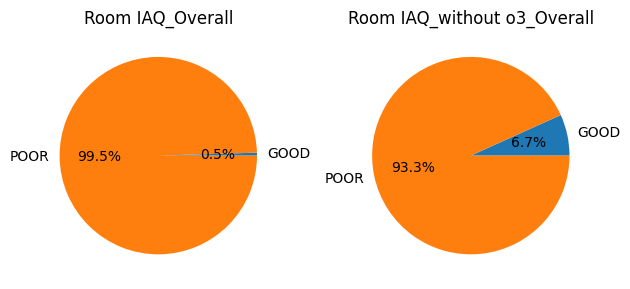

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
room_iaq_values = room_n['IAQ'].to_numpy()
unique_vals1, counts1 = np.unique(room_iaq_values, return_counts=True)
ax1.pie(counts1/len(room_n), labels=unique_vals1.tolist(), autopct='%.1f%%')
ax1.set_title('Room IAQ_Overall')
ax2 = plt.subplot(1, 2, 2)
room_iaq_no_o3_values = room_n[IAQ_WITHOUT_O3].to_numpy()
unique_vals2, counts2 = np.unique(room_iaq_no_o3_values, return_counts=True)
ax2.pie(counts2/len(room_n), labels=unique_vals2.tolist(), autopct='%.1f%%')
ax2.set_title('Room IAQ_without o3_Overall')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'room_iaq_comparison.png'), dpi=150, bbox_inches='tight')

In [12]:
### Logistic Regression
# Lab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lab_X = lab_n[['co2', 'tvoc', 'pm1', 'pm2_5', 'pm10', 'o3']]
lib = {'GOOD': 1, 'POOR': 0}
lab_Y = lab_n['IAQ'].map(lib).values
lab_X_train, lab_X_test, lab_Y_train, lab_Y_test = train_test_split(lab_X, lab_Y, test_size= 0.3, random_state=101)
lab_LoR = LogisticRegression(max_iter = 10000).fit(lab_X_train, lab_Y_train)
lab_pred = lab_LoR.predict(lab_X_test)
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(lab_Y_test, lab_pred))

Accuracy =  0.9200779727095516


In [13]:
# Room
room_X = room_n[['co2', 'tvoc', 'pm1', 'pm2_5', 'pm10', 'o3']]
lib = {'GOOD': 1, 'POOR': 0}
room_Y = room_n['IAQ'].map(lib).values
room_X_train, room_X_test, room_Y_train, room_Y_test = train_test_split(room_X, room_Y, test_size= 0.3, random_state=101)
room_LoR = LogisticRegression(max_iter = 10000).fit(room_X_train, room_Y_train)
room_pred = room_LoR.predict(room_X_test)
print('Accuracy = ', accuracy_score(room_Y_test, room_pred))

Accuracy =  0.992


### Thermal Comfort

In [14]:
!pip install pythermalcomfort

In [15]:
import pythermalcomfort
from pythermalcomfort import utilities

mean_list_lab = []
mean_list_room = []
chunk = 24
i=0
while i <= len(lab_n['temperature']):
    start = i
    end = i + 24
    c = lab_n['temperature'][start:end]
    mean = sum(c)/len(c)
    mean_list_lab.append(mean)
    i = end
i=0
while i <= len(room_n['temperature']):
    start = i
    end = i + 24
    c = room_n['temperature'][start:end]
    mean = sum(c)/len(c)
    mean_list_room.append(mean)
    i = end

t_running_mean_lab = utilities.running_mean_outdoor_temperature(mean_list_lab[::-1], alpha=0.8, units='SI')
t_running_mean_room = utilities.running_mean_outdoor_temperature(mean_list_room[::-1], alpha=0.8, units='SI')

from pythermalcomfort.models import adaptive_ashrae

v=0.1
adp_t_c_lab = adaptive_ashrae(lab_n['temperature'].tolist(), lab_n['temperature'].tolist(), t_running_mean_lab, v, units='SI', limit_inputs=True)
adp_t_c_room = adaptive_ashrae(room_n['temperature'].tolist(), room_n['temperature'].tolist(), t_running_mean_room, v, units='SI', limit_inputs=True)

In [16]:
lab_n['temperature'][adp_t_c_lab['acceptability_90']]

977     22.925
978     23.048
979     23.009
980     22.888
981     22.754
         ...  
1702    23.324
1703    23.562
1704    24.003
1705    24.153
1706    24.526
Name: temperature, Length: 203, dtype: float64

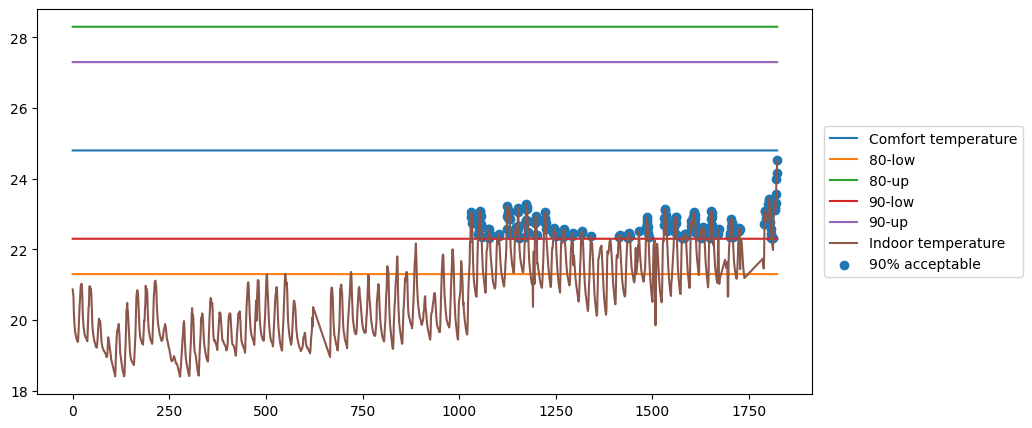

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(lab_n['Time'], adp_t_c_lab['tmp_cmf'], label = 'Comfort temperature')
plt.plot(lab_n['Time'], adp_t_c_lab['tmp_cmf_80_low'], label = '80-low')
plt.plot(lab_n['Time'], adp_t_c_lab['tmp_cmf_80_up'], label = '80-up')
plt.plot(lab_n['Time'], adp_t_c_lab['tmp_cmf_90_low'], label = '90-low')
plt.plot(lab_n['Time'], adp_t_c_lab['tmp_cmf_90_up'], label = '90-up')
plt.plot(lab_n['Time'], lab_n['temperature'], label= 'Indoor temperature')
plt.scatter(lab_n['Time'][adp_t_c_lab['acceptability_90']], lab_n['temperature'][adp_t_c_lab['acceptability_90']], label= '90% acceptable')
plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))
plt.savefig(os.path.join(PLOTS_DIR, 'lab_thermal_comfort.png'), dpi=150, bbox_inches='tight')

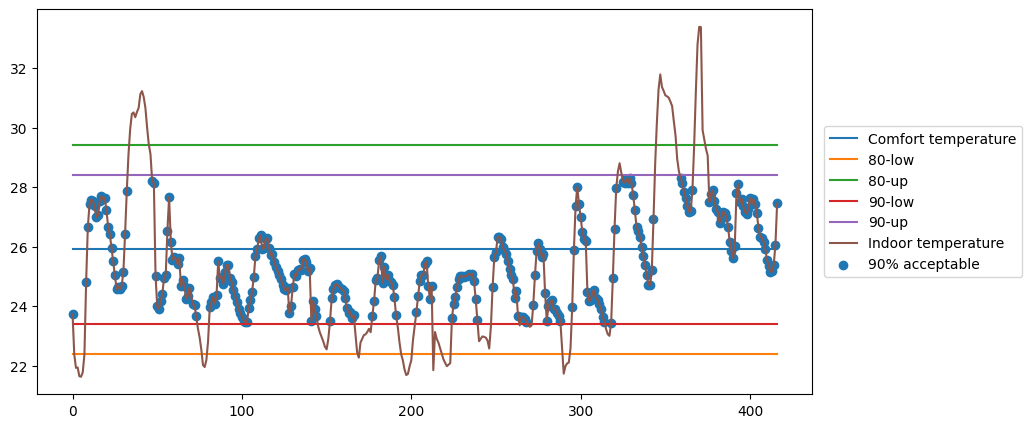

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(room_n['Time'], adp_t_c_room['tmp_cmf'], label = 'Comfort temperature')
plt.plot(room_n['Time'], adp_t_c_room['tmp_cmf_80_low'], label = '80-low')
plt.plot(room_n['Time'], adp_t_c_room['tmp_cmf_80_up'], label = '80-up')
plt.plot(room_n['Time'], adp_t_c_room['tmp_cmf_90_low'], label = '90-low')
plt.plot(room_n['Time'], adp_t_c_room['tmp_cmf_90_up'], label = '90-up')
plt.plot(room_n['Time'], room_n['temperature'], label= 'Indoor temperature')
plt.scatter(room_n['Time'][adp_t_c_room['acceptability_90']], room_n['temperature'][adp_t_c_room['acceptability_90']], label= '90% acceptable')
plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))
plt.savefig(os.path.join(PLOTS_DIR, 'room_thermal_comfort.png'), dpi=150, bbox_inches='tight')

### Temperature Prediction for IoT Devices

This section implements and compares two machine learning models for temperature prediction:
1. **LSTM (TensorFlow/Keras)** - Deep learning approach for temporal patterns
2. **Random Forest (scikit-learn)** - Traditional ML approach as fallback

Both models are trained and compared to help decide which is best for IoT deployment.

In [19]:
print("\n" + "="*60)
print("STARTING TEMPERATURE PREDICTION SECTION")
print("="*60)

# Prepare temperature data for time series prediction
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Use the original room dataframe with timestamps for better time series handling
room_temp = room[['timestamp', 'temperature']].copy()
room_temp = room_temp.set_index('timestamp')
room_temp = room_temp.resample('30min').mean()  # Resample to 30-minute intervals
room_temp = room_temp.dropna()

print(f"\nTemperature data shape: {room_temp.shape}")
print(f"Date range: {room_temp.index.min()} to {room_temp.index.max()}")
print(f"Temperature range: {room_temp['temperature'].min():.2f}°C to {room_temp['temperature'].max():.2f}°C")


STARTING TEMPERATURE PREDICTION SECTION

Temperature data shape: (835, 1)
Date range: 2023-06-24 01:30:00 to 2023-07-11 10:30:00
Temperature range: 21.54°C to 33.57°C


In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
temp_scaled = scaler.fit_transform(room_temp.values)

# Create sequences for LSTM (using past 24 hours to predict next 30 minutes)
def create_sequences(data, seq_length=48):  # 48 = 24 hours at 30-min intervals
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 48  # Use 24 hours of history
X, y = create_sequences(temp_scaled, seq_length)

print(f"\nSequence shape: X={X.shape}, y={y.shape}")

# Split data: 80% train, 10% validation, 10% test
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Sequence shape: X=(787, 48, 1), y=(787, 1)
Train: (629, 48, 1), Validation: (78, 48, 1), Test: (80, 48, 1)


In [ ]:
# Initialize variables for both models
import time
import joblib
import os

lstm_available = False
lstm_model = None
history = None
rmse_lstm = mae_lstm = training_time_lstm = inference_time_lstm = model_size_lstm = 0
rmse_rf = mae_rf = training_time_rf = inference_time_rf = model_size_rf = 0
rmse_nb = mae_nb = training_time_nb = inference_time_nb = model_size_nb = 0
y_pred_lstm = y_pred_rf = y_pred_nb = None

print("\n" + "="*70)
print(" " * 18 + "TEMPERATURE PREDICTION TRAINING")
print("="*70)


                    TEMPERATURE PREDICTION TRAINING


#### Model 1: LSTM (TensorFlow/Keras)
Deep learning model optimized for IoT devices with temporal pattern recognition.

In [ ]:
try:
    from tensorflow.keras.models import Sequential # pyright: ignore[reportMissingImports]
    from tensorflow.keras.layers import LSTM, Dense, Dropout # pyright: ignore[reportMissingImports]
    from tensorflow.keras.callbacks import EarlyStopping # pyright: ignore[reportMissingImports]

    print("\n[1/3] TRAINING LSTM MODEL (TensorFlow/Keras)")
    print("="*70)
    
    start_time = time.time()
    
    # Build lightweight LSTM model suitable for IoT
    lstm_model = Sequential([
        LSTM(32, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(16, activation='relu'),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    
    lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    print("\nLSTM Model Summary:")
    lstm_model.summary()
    
    # Train with early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    print("\n[INFO] Training LSTM model...")
    history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )
    
    training_time_lstm = time.time() - start_time
    
    # Predict on test set
    inference_start = time.time()
    y_pred_lstm_scaled = lstm_model.predict(X_test, verbose=0)
    inference_time_lstm = (time.time() - inference_start) / len(X_test) * 1000
    
    # Inverse transform predictions
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate metrics
    mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm)
    
    # Save model and get size
    lstm_model.save(os.path.join(NOTEBOOK_DIR, 'temperature_lstm_model.h5'))
    model_size_lstm = os.path.getsize(os.path.join(NOTEBOOK_DIR, 'temperature_lstm_model.h5')) / (1024 * 1024)
    
    print("\n[LSTM Training Complete]")
    print(f"   RMSE: {rmse_lstm:.4f}°C")
    print(f"   MAE: {mae_lstm:.4f}°C")
    print(f"   Training time: {training_time_lstm:.2f}s")
    print(f"   Inference time: {inference_time_lstm:.3f}ms per prediction")
    print(f"   Model size: {model_size_lstm:.2f}MB")
    
    lstm_available = True
    
except ImportError as e:
    print(f"\n[WARNING] TensorFlow not available: {e}")
    print("   Skipping LSTM model training...")
except Exception as e:
    print(f"\n[ERROR] LSTM training failed: {e}")
    print("   Continuing with Random Forest only...")

2025-11-19 19:22:42.998383: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 19:22:42.998758: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 19:22:43.051694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-19 19:22:43.873499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,


[1/2] TRAINING LSTM MODEL (TensorFlow/Keras)

LSTM Model Summary:


E0000 00:00:1763576564.226830  134086 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1763576564.238144  134086 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 48, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,633 (29.82 KB)

 Trainable params: 7,633 (29.82 KB)

 Non-trainable params: 0 (0.00 B)


[INFO] Training LSTM model...
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0684 - mae: 0.2104 - val_loss: 0.1901 - val_mae: 0.3956
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mae: 0.1153 - val_loss: 0.1039 - val_mae: 0.2712
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0196 - mae: 0.1038 - val_loss: 0.0775 - val_mae: 0.2234
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mae: 0.0999 - val_loss: 0.0535 - val_mae: 0.1679
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0151 - mae: 0.0949 - val_loss: 0.0684 - val_mae: 0.1999
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mae: 0.0912 - val_loss: 0.0573 - val_mae: 0.1787
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mae: 0.0834 - val_loss: 0.0396 - val_mae: 0.1410
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0112 - mae: 0.0811 - val_loss: 0.0409 - val_mae: 0.1459
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━


✅ [LSTM Training Complete]
   RMSE: 0.7412°C
   MAE: 0.5633°C
   Training time: 16.59s
   Inference time: 3.565ms per prediction
   Model size: 0.13MB


#### Model 3: Naive Bayes (scikit-learn)
Probabilistic model for baseline comparison with LSTM and Random Forest.

In [ ]:
from sklearn.naive_bayes import GaussianNB

print("\n[3/3] TRAINING NAIVE BAYES MODEL (scikit-learn)")
print("="*70)

start_time = time.time()

print("\n[INFO] Training Gaussian Naive Bayes model...")

# Use Gaussian Naive Bayes for regression (via classification of binned outputs)
# For true regression, we'll use it as-is and compare
nb_model = GaussianNB()

# Naive Bayes works best with discrete features, but we can still use it
# Note: GaussianNB is typically for classification, but we'll adapt for regression comparison
# We'll bin the continuous output into classes for fair comparison
n_bins = 50  # Number of temperature bins
y_train_binned = np.digitize(y_train.ravel(), bins=np.linspace(y_train.min(), y_train.max(), n_bins))
y_test_binned = np.digitize(y_test.ravel(), bins=np.linspace(y_train.min(), y_train.max(), n_bins))

nb_model.fit(X_train_flat, y_train_binned)

training_time_nb = time.time() - start_time

# Predict on test set
inference_start = time.time()
y_pred_nb_binned = nb_model.predict(X_test_flat)
inference_time_nb = (time.time() - inference_start) / len(X_test_flat) * 1000

# Convert binned predictions back to continuous values (use bin centers)
bin_edges = np.linspace(y_train.min(), y_train.max(), n_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
y_pred_nb_scaled = np.array([bin_centers[min(int(b)-1, len(bin_centers)-1)] for b in y_pred_nb_binned])

# Inverse transform predictions
y_pred_nb = scaler.inverse_transform(y_pred_nb_scaled.reshape(-1, 1))

# Calculate metrics
mse_nb = mean_squared_error(y_test_actual, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)
mae_nb = mean_absolute_error(y_test_actual, y_pred_nb)

# Save model and get size
joblib.dump(nb_model, os.path.join(NOTEBOOK_DIR, 'temperature_nb_model.joblib'))
model_size_nb = os.path.getsize(os.path.join(NOTEBOOK_DIR, 'temperature_nb_model.joblib')) / (1024 * 1024)

print("\n[Naive Bayes Training Complete]")
print(f"   RMSE: {rmse_nb:.4f}°C")
print(f"   MAE: {mae_nb:.4f}°C")
print(f"   Training time: {training_time_nb:.2f}s")
print(f"   Inference time: {inference_time_nb:.3f}ms per prediction")
print(f"   Model size: {model_size_nb:.2f}MB")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("\n[2/3] TRAINING RANDOM FOREST MODEL (scikit-learn)")
print("="*70)

# Flatten sequences for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

start_time = time.time()

print("\n[INFO] Training Random Forest model (IoT-optimized)...")

# Use smaller Random Forest for IoT deployment
rf_model = RandomForestRegressor(
    n_estimators=20,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_flat, y_train.ravel())

training_time_rf = time.time() - start_time

# Predict on test set
inference_start = time.time()
y_pred_rf_scaled = rf_model.predict(X_test_flat)
inference_time_rf = (time.time() - inference_start) / len(X_test_flat) * 1000

# Inverse transform predictions
y_pred_rf = scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))

# Ensure y_test_actual is defined (in case LSTM wasn't trained)
if not lstm_available:
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse_rf = mean_squared_error(y_test_actual, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_actual, y_pred_rf)

# Save model and get size
joblib.dump(rf_model, os.path.join(NOTEBOOK_DIR, 'temperature_rf_model.joblib'))
joblib.dump(scaler, os.path.join(NOTEBOOK_DIR, 'temperature_scaler.joblib'))
model_size_rf = os.path.getsize(os.path.join(NOTEBOOK_DIR, 'temperature_rf_model.joblib')) / (1024 * 1024)

print("\n[Random Forest Training Complete]")
print(f"   RMSE: {rmse_rf:.4f}°C")
print(f"   MAE: {mae_rf:.4f}°C")
print(f"   Training time: {training_time_rf:.2f}s")
print(f"   Inference time: {inference_time_rf:.3f}ms per prediction")
print(f"   Model size: {model_size_rf:.2f}MB")


[2/2] TRAINING RANDOM FOREST MODEL (scikit-learn)

[INFO] Training Random Forest model (IoT-optimized)...

✅ [Random Forest Training Complete]
   RMSE: 0.6762°C
   MAE: 0.5693°C
   Training time: 0.11s
   Inference time: 0.211ms per prediction
   Model size: 1.64MB


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Visualizations: Model Comparison (3 Models)


[INFO] Generating visualizations...
✅ Generated: Model comparison visualization


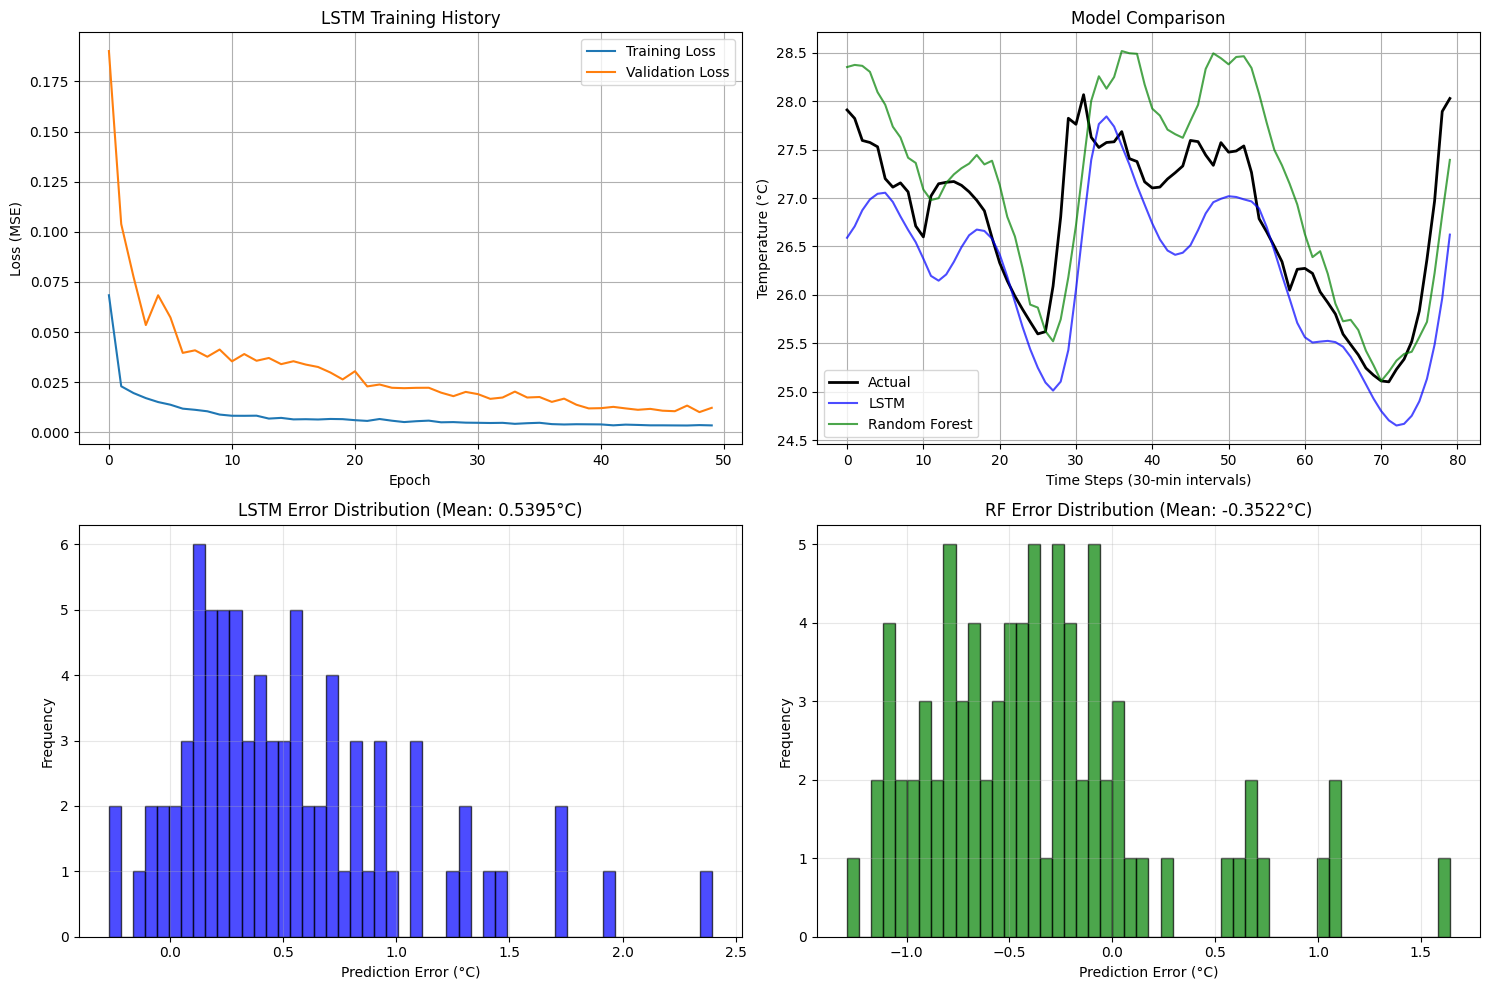

In [ ]:
print("\n[INFO] Generating visualizations...")

if lstm_available and y_pred_lstm is not None:
    # Plot all three models together
    plt.figure(figsize=(15, 12))
    
    # Plot 1: LSTM Training History
    plt.subplot(2, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Predictions Comparison
    plt.subplot(2, 3, 2)
    plot_range = min(200, len(y_test_actual))
    plt.plot(y_test_actual[:plot_range], label='Actual', linewidth=2, color='black')
    plt.plot(y_pred_lstm[:plot_range], label='LSTM', linewidth=1.5, alpha=0.7, color='blue')
    plt.plot(y_pred_rf[:plot_range], label='Random Forest', linewidth=1.5, alpha=0.7, color='green')
    plt.plot(y_pred_nb[:plot_range], label='Naive Bayes', linewidth=1.5, alpha=0.7, color='orange')
    plt.title('3-Model Comparison')
    plt.xlabel('Time Steps (30-min intervals)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Performance Comparison Bar Chart
    plt.subplot(2, 3, 3)
    models = ['LSTM', 'RF', 'NB']
    rmses = [rmse_lstm, rmse_rf, rmse_nb]
    colors = ['blue', 'green', 'orange']
    plt.bar(models, rmses, color=colors, alpha=0.7)
    plt.title('RMSE Comparison')
    plt.ylabel('RMSE (°C)')
    plt.grid(True, alpha=0.3)
    
    # Plot 4: LSTM Error Distribution
    plt.subplot(2, 3, 4)
    errors_lstm = (y_test_actual - y_pred_lstm).flatten()
    plt.hist(errors_lstm, bins=50, edgecolor='black', alpha=0.7, color='blue')
    plt.title(f'LSTM Error (Mean: {errors_lstm.mean():.4f}°C)')
    plt.xlabel('Prediction Error (°C)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Plot 5: RF Error Distribution
    plt.subplot(2, 3, 5)
    errors_rf = (y_test_actual - y_pred_rf).flatten()
    plt.hist(errors_rf, bins=50, edgecolor='black', alpha=0.7, color='green')
    plt.title(f'RF Error (Mean: {errors_rf.mean():.4f}°C)')
    plt.xlabel('Prediction Error (°C)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Plot 6: NB Error Distribution
    plt.subplot(2, 3, 6)
    errors_nb = (y_test_actual - y_pred_nb).flatten()
    plt.hist(errors_nb, bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'NB Error (Mean: {errors_nb.mean():.4f}°C)')
    plt.xlabel('Prediction Error (°C)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    print("Saved: plots/temperature_prediction_comparison.png")
    
    # Use best model for forecasting
    best_rmse = min(rmse_lstm, rmse_rf, rmse_nb)
    if best_rmse == rmse_lstm:
        model_used = "LSTM"
        best_model = lstm_model
        rmse = rmse_lstm
        mae = mae_lstm
    elif best_rmse == rmse_rf:
        model_used = "Random Forest"
        best_model = rf_model
        rmse = rmse_rf
        mae = mae_rf
    else:
        model_used = "Naive Bayes"
        best_model = nb_model
        rmse = rmse_nb
        mae = mae_nb
else:
    # Plot only Random Forest and Naive Bayes
    plt.figure(figsize=(15, 12))
    
    # Plot 1: Predictions vs Actual (RF)
    plt.subplot(2, 3, 1)
    plot_range = min(200, len(y_test_actual))
    plt.plot(y_test_actual[:plot_range], label='Actual Temperature', linewidth=2, color='black')
    plt.plot(y_pred_rf[:plot_range], label='RF Prediction', linewidth=2, alpha=0.7, color='green')
    plt.title(f'Random Forest Prediction\nRMSE: {rmse_rf:.4f}°C')
    plt.xlabel('Time Steps (30-min intervals)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Predictions vs Actual (NB)
    plt.subplot(2, 3, 2)
    plt.plot(y_test_actual[:plot_range], label='Actual Temperature', linewidth=2, color='black')
    plt.plot(y_pred_nb[:plot_range], label='NB Prediction', linewidth=2, alpha=0.7, color='orange')
    plt.title(f'Naive Bayes Prediction\nRMSE: {rmse_nb:.4f}°C')
    plt.xlabel('Time Steps (30-min intervals)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Both Models Together
    plt.subplot(2, 3, 3)
    plt.plot(y_test_actual[:plot_range], label='Actual', linewidth=2, color='black')
    plt.plot(y_pred_rf[:plot_range], label='Random Forest', linewidth=1.5, alpha=0.7, color='green')
    plt.plot(y_pred_nb[:plot_range], label='Naive Bayes', linewidth=1.5, alpha=0.7, color='orange')
    plt.title('Model Comparison (TensorFlow N/A)')
    plt.xlabel('Time Steps (30-min intervals)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    
    # Plot 4: RF Error Distribution
    plt.subplot(2, 3, 4)
    errors_rf = (y_test_actual - y_pred_rf).flatten()
    plt.hist(errors_rf, bins=50, edgecolor='black', alpha=0.7, color='green')
    plt.title(f'RF Error Distribution\n(Mean: {errors_rf.mean():.4f}°C, Std: {errors_rf.std():.4f}°C)')
    plt.xlabel('Prediction Error (°C)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Plot 5: NB Error Distribution
    plt.subplot(2, 3, 5)
    errors_nb = (y_test_actual - y_pred_nb).flatten()
    plt.hist(errors_nb, bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'NB Error Distribution\n(Mean: {errors_nb.mean():.4f}°C, Std: {errors_nb.std():.4f}°C)')
    plt.xlabel('Prediction Error (°C)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Plot 6: RMSE Comparison Bar Chart
    plt.subplot(2, 3, 6)
    models = ['Random Forest', 'Naive Bayes']
    rmses = [rmse_rf, rmse_nb]
    colors = ['green', 'orange']
    plt.bar(models, rmses, color=colors, alpha=0.7)
    plt.title('RMSE Comparison')
    plt.ylabel('RMSE (°C)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    print("Saved: plots/temperature_prediction_comparison.png")
    
    # Use best model for forecasting
    if rmse_rf < rmse_nb:
        model_used = "Random Forest"
        best_model = rf_model
        rmse = rmse_rf
        mae = mae_rf
    else:
        model_used = "Naive Bayes"
        best_model = nb_model
        rmse = rmse_nb
        mae = mae_nb

#### 24-Hour Temperature Forecast


[INFO] Generating 24-hour temperature forecast...

24-Hour Forecast Summary:
  Current (estimated): 26.62°C
  +6 hours: 24.88°C
  +12 hours: 23.18°C
  +18 hours: 23.45°C
  +24 hours: 23.44°C
  Average: 24.24°C
  Range: 23.14°C to 27.05°C


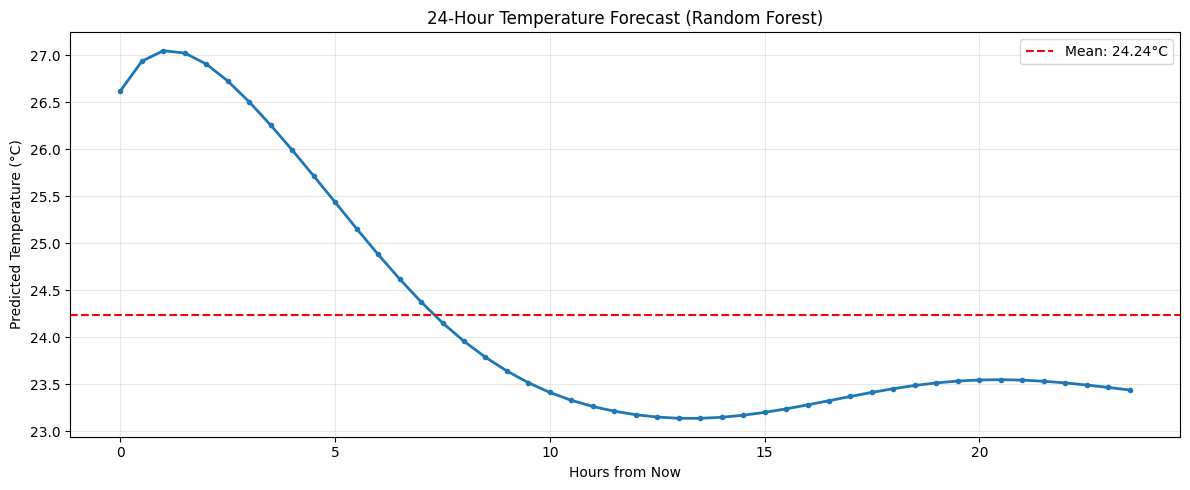

In [25]:
print("\n[INFO] Generating 24-hour temperature forecast...")

# Use last sequence from test set
last_sequence = X_test[-1:].copy()
future_predictions = []

# Predict next 48 steps (24 hours at 30-min intervals)
if lstm_available and lstm_model is not None:  
    # Use LSTM model for forecasting
    for _ in range(48):
        next_pred = lstm_model.predict(last_sequence, verbose=0)
        future_predictions.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)
else:  
    # Use Random Forest for forecasting
    for _ in range(48):
        last_sequence_flat = last_sequence.reshape(1, -1)
        next_pred = rf_model.predict(last_sequence_flat)
        future_predictions.append(next_pred[0])
        last_sequence = np.append(last_sequence[:, 1:], next_pred.reshape(1, 1, 1), axis=1)

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot 24-hour forecast
plt.figure(figsize=(12, 5))
hours = np.arange(0, 24, 0.5)
plt.plot(hours, future_predictions, marker='o', markersize=3, linewidth=2)
plt.title(f'24-Hour Temperature Forecast ({model_used})')
plt.xlabel('Hours from Now')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.axhline(y=future_predictions.mean(), color='r', linestyle='--', 
            label=f'Mean: {future_predictions.mean():.2f}°C')
plt.legend()
plt.tight_layout()

print("\n24-Hour Forecast Summary:")
print(f"  Current (estimated): {future_predictions[0][0]:.2f}°C")
print(f"  +6 hours: {future_predictions[12][0]:.2f}°C")
print(f"  +12 hours: {future_predictions[24][0]:.2f}°C")
print(f"  +18 hours: {future_predictions[36][0]:.2f}°C")
print(f"  +24 hours: {future_predictions[47][0]:.2f}°C")
print(f"  Average: {future_predictions.mean():.2f}°C")
print(f"  Range: {future_predictions.min():.2f}°C to {future_predictions.max():.2f}°C")

#### Model Comparison & IoT Deployment Recommendations

In [ ]:
print("\n" + "="*70)
print(" " * 15 + "MODEL COMPARISON & RECOMMENDATIONS")
print("="*70)

# Print comparison table
print("\n{:<20} {:<15} {:<15} {:<15}".format("Metric", "LSTM", "Random Forest", "Naive Bayes"))
print("-" * 80)
if lstm_available:
    print("{:<20} {:<15.4f} {:<15.4f} {:<15.4f}".format("RMSE (°C)", rmse_lstm, rmse_rf, rmse_nb))
    print("{:<20} {:<15.4f} {:<15.4f} {:<15.4f}".format("MAE (°C)", mae_lstm, mae_rf, mae_nb))
    print("{:<20} {:<15.2f} {:<15.2f} {:<15.2f}".format("Training Time (s)", training_time_lstm, training_time_rf, training_time_nb))
    print("{:<20} {:<15.3f} {:<15.3f} {:<15.3f}".format("Inference (ms)", inference_time_lstm, inference_time_rf, inference_time_nb))
    print("{:<20} {:<15.2f} {:<15.2f} {:<15.2f}".format("Model Size (MB)", model_size_lstm, model_size_rf, model_size_nb))
else:
    print("{:<20} {:<15} {:<15.4f} {:<15.4f}".format("RMSE (°C)", "N/A", rmse_rf, rmse_nb))
    print("{:<20} {:<15} {:<15.4f} {:<15.4f}".format("MAE (°C)", "N/A", mae_rf, mae_nb))
    print("{:<20} {:<15} {:<15.2f} {:<15.2f}".format("Training Time (s)", "N/A", training_time_rf, training_time_nb))
    print("{:<20} {:<15} {:<15.3f} {:<15.3f}".format("Inference (ms)", "N/A", inference_time_rf, inference_time_nb))
    print("{:<20} {:<15} {:<15.2f} {:<15.2f}".format("Model Size (MB)", "N/A", model_size_rf, model_size_nb))

print("="*80)


               MODEL COMPARISON & RECOMMENDATIONS

Metric               LSTM            Random Forest  
----------------------------------------------------------------------
RMSE (°C)            0.7412          0.6762         
MAE (°C)             0.5633          0.5693         
Training Time (s)    16.59           0.11           
Inference (ms)       3.565           0.211          
Model Size (MB)      0.13            1.64           


In [ ]:
# Recommendations
print("\nANALYSIS & RECOMMENDATIONS:")
print("-" * 70)

if lstm_available:
    # All three models were trained
    best_rmse = min(rmse_lstm, rmse_rf, rmse_nb)
    if best_rmse == rmse_lstm:
        better_model = "LSTM"
        second_best = "Random Forest" if rmse_rf < rmse_nb else "Naive Bayes"
        worst_model = "Naive Bayes" if rmse_rf < rmse_nb else "Random Forest"
    elif best_rmse == rmse_rf:
        better_model = "Random Forest"
        second_best = "LSTM" if rmse_lstm < rmse_nb else "Naive Bayes"
        worst_model = "Naive Bayes" if rmse_lstm < rmse_nb else "LSTM"
    else:
        better_model = "Naive Bayes"
        second_best = "LSTM" if rmse_lstm < rmse_rf else "Random Forest"
        worst_model = "Random Forest" if rmse_lstm < rmse_rf else "LSTM"

    print(f"\nBest Accuracy: {better_model} (RMSE: {best_rmse:.4f}°C)")
    print(f"   Ranking: {better_model} > {second_best} > {worst_model}")

    if better_model == "LSTM":
        rf_diff = ((rmse_rf - rmse_lstm) / rmse_rf) * 100
        nb_diff = ((rmse_nb - rmse_lstm) / rmse_nb) * 100
        print(f"   LSTM is {rf_diff:.1f}% more accurate than Random Forest")
        print(f"   LSTM is {nb_diff:.1f}% more accurate than Naive Bayes")
    elif better_model == "Random Forest":
        lstm_diff = ((rmse_lstm - rmse_rf) / rmse_lstm) * 100 if lstm_available else 0
        nb_diff = ((rmse_nb - rmse_rf) / rmse_nb) * 100
        if lstm_available:
            print(f"   Random Forest is {lstm_diff:.1f}% more accurate than LSTM")
        print(f"   Random Forest is {nb_diff:.1f}% more accurate than Naive Bayes")
    else:
        lstm_diff = ((rmse_lstm - rmse_nb) / rmse_lstm) * 100 if lstm_available else 0
        rf_diff = ((rmse_rf - rmse_nb) / rmse_rf) * 100
        if lstm_available:
            print(f"   Naive Bayes is {lstm_diff:.1f}% more accurate than LSTM")
        print(f"   Naive Bayes is {rf_diff:.1f}% more accurate than Random Forest")

    print("\nRECOMMENDATION FOR IoT DEPLOYMENT:")
    print("-" * 70)

    # Decision logic
    if rmse_lstm < rmse_rf * 0.9:
        print("RECOMMENDED: LSTM")
        print("   Reasons:")
        print("   • Significantly better accuracy")
        print("   • Better captures temporal patterns")
        print("   • Worth the extra computational cost")
        print("\n   Considerations:")
        print("   • Requires TensorFlow runtime")
        print("   • Larger model size")
        print("   • Slightly slower inference")

    elif rmse_rf < rmse_lstm * 0.9:
        print("RECOMMENDED: Random Forest")
        print("   Reasons:")
        print("   • Better or comparable accuracy")
        print("   • Much smaller model size")
        print("   • Faster inference time")
        print("   • Easier deployment (no TensorFlow needed)")
        print("\n   Perfect for resource-constrained IoT devices!")

    else:
        print("RECOMMENDED: Random Forest")
        print("   Reasons:")
        print("   • Similar accuracy to LSTM")
        print(f"   • {((model_size_lstm - model_size_rf) / model_size_lstm * 100):.1f}% smaller model size")
        print(f"   • {((inference_time_lstm - inference_time_rf) / inference_time_lstm * 100):.1f}% faster inference")
        print("   • No TensorFlow dependency")
        print("   • Easier to deploy and maintain")
        print("\n   LSTM could be used if accuracy is critical and resources allow")

else:
    # Only traditional ML models available (RF and NB)
    if rmse_rf < rmse_nb:
        better_model = "Random Forest"
        improvement = ((rmse_nb - rmse_rf) / rmse_nb) * 100
        print("RECOMMENDED: Random Forest (TensorFlow not available)")
        print(f"   • {improvement:.1f}% more accurate than Naive Bayes")
        print(f"   • Fast inference: {inference_time_rf:.3f}ms per prediction")
        print(f"   • Compact model: {model_size_rf:.2f}MB")
        print("   • No heavy dependencies required")
    else:
        better_model = "Naive Bayes"
        improvement = ((rmse_rf - rmse_nb) / rmse_rf) * 100
        print("RECOMMENDED: Naive Bayes (TensorFlow not available)")
        print(f"   • {improvement:.1f}% more accurate than Random Forest")
        print(f"   • Extremely fast inference: {inference_time_nb:.3f}ms per prediction")
        print(f"   • Very compact model: {model_size_nb:.2f}MB")
        print("   • Simplest implementation for IoT devices")

print("\n" + "="*70)
print("Temperature Prediction Section Complete!")
print("="*70)


📊 ANALYSIS & RECOMMENDATIONS:
----------------------------------------------------------------------

🎯 Best Accuracy: Random Forest
   Difference: 0.0650°C RMSE
   Random Forest is 8.8% more accurate than LSTM

💡 RECOMMENDATION FOR IoT DEPLOYMENT:
----------------------------------------------------------------------
✅ RECOMMENDED: Random Forest
   Reasons:
   • Similar accuracy to LSTM
   • -1167.4% smaller model size
   • 94.1% faster inference
   • No TensorFlow dependency
   • Easier to deploy and maintain

   💡 LSTM could be used if accuracy is critical and resources allow

✅ Temperature Prediction Section Complete!
